In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/your_project_folder/'
from google.colab import drive


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

project_root_dir='/content/gdrive/My Drive'
chap_id='Second project'
images_path=os.path.join(project_root_dir,'images',chap_id)
os.makedirs(images_path,exist_ok=True)

def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=300):
  path=os.path.join(images_path,fig_id+'.'+fig_extension)
  print("Saving image",fig_id)
  if tight_layout:
    plt.tight_layout
  plt.savefig(path,format=fig_extension,dpi=resolution)

In [ ]:
import pandas as pd
import os
from datetime import datetime

start=datetime.now()
row=list()
data=open('data.csv',mode='w')
files=['./gdrive/My Drive/Datasets/combined_data_1.txt','./gdrive/My Drive/Datasets/combined_data_2.txt']
for file in files:
  print('Reading rating from {}'.format(file))
  with open(file) as f:
    for line in f:
      line=line.strip()
      if line.endswith(':'):
        movie_id=line.replace(':','')
      else:
        row=[i for i in line.split(',')] 
        row.insert(0,movie_id) 
        data.write(','.join(row))
        data.write('\n')
  print('Done')    
data.close()      
                 
print('Time Taken',datetime.now()-start)


Reading rating from ./gdrive/My Drive/Datasets/combined_data_1.txt
Done
Reading rating from ./gdrive/My Drive/Datasets/combined_data_2.txt
Done
Time Taken 0:00:45.825827


In [ ]:
df=pd.read_csv('data.csv',sep=',',names=['movie','user','rating','Date'])


In [ ]:
df.Date=pd.to_datetime(df.Date)
df.sort_values('Date',inplace=True)

In [ ]:
df.rating.value_counts()

4    9063787
3    7826098
5    6060011
2    2768937
1    1258758
Name: rating, dtype: int64

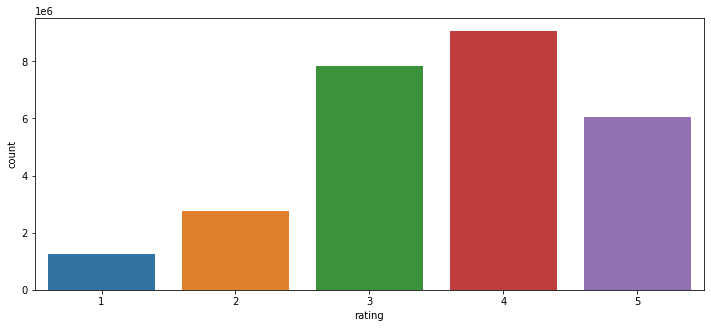

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.countplot(df.rating)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26977591 entries, 6465113 to 16987546
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   movie   int64         
 1   user    int64         
 2   rating  int64         
 3   Date    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.3 GB


In [ ]:
df.describe()

,movie,user,rating
count,2.697759e+07,2.697759e+07,2.697759e+07
mean,6.755744e+03,1.322503e+06,3.589280e+00
std,1.336999e+03,7.645214e+05,1.084677e+00
min,4.500000e+03,6.000000e+00,1.000000e+00
25%,5.614000e+03,6.614070e+05,3.000000e+00
50%,6.692000e+03,1.318995e+06,4.000000e+00
75%,7.828000e+03,1.984495e+06,4.000000e+00
max,9.210000e+03,2.649429e+06,5.000000e+00


In [ ]:
print('No. of null values',sum(df.isnull().any()))

No. of null values 0


In [ ]:
dup=sum(df.duplicated(['movie','user','rating']))
print('There are {} duplicated entries in dataset'.format(dup))

There are 0 duplicated entries in dataset


In [ ]:
print('Total statistics------')
print('Total no. of rating',(df.shape[0]))
print('Total no. of movies',len(np.unique(df.movie)))
print('Total no. of users',len(np.unique(df.user)))

Total statistics------
Total no. of rating 26977591
Total no. of movies 4711
Total no. of users 474062


In [ ]:
test_idx=int(len(df)*0.8)

train=df.iloc[:test_idx]
test=df.iloc[test_idx:]

In [ ]:
train.to_csv('./gdrive/My Drive/Datasets/train_movie.csv',index=False)
test.to_csv('./gdrive/My Drive/Datasets/test_movie.csv',index=False)

In [ ]:
import pandas as pd
import seaborn as sns
train=pd.read_csv('./gdrive/My Drive/Datasets/train_movie.csv')
train.Date=pd.to_datetime(train.Date)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def convert_to_text(num,units='M'):
  num=float(num)
  if units=='K':
    return str(num/1000)+'K'
  elif units=='M':
    return str(num/10**6)+'M' 
  elif units=='B':
    return str(num/10**9)+'B'



  


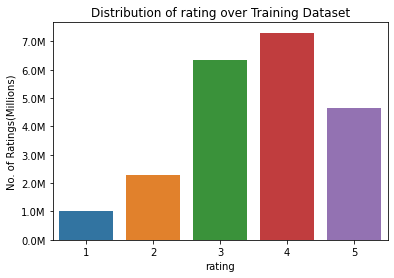

In [ ]:
fig,ax=plt.subplots()
plt.title('Distribution of rating over Training Dataset')
sns.countplot(train.rating)
ax.set_yticklabels([convert_to_text(item,'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None 
train['Day of the week']=train['Date'].dt.day_name()

In [ ]:
train.head()

,movie,user,rating,Date,Day of the week
0,5571,510180,4,1999-11-11,Thursday
1,8079,510180,2,1999-11-11,Thursday
2,6615,510180,5,1999-11-11,Thursday
3,8651,510180,2,1999-11-11,Thursday
4,8357,510180,4,1999-11-11,Thursday


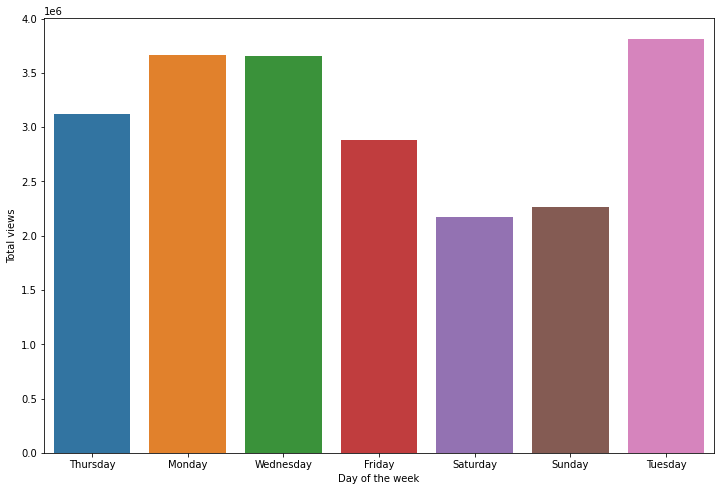

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(train['Day of the week'])
plt.ylabel('Total views')
plt.show()

In [ ]:
count_per_year=[]
year=[i.year for i in train['Date']]

In [ ]:
from collections import Counter
count_per_year=Counter(year)


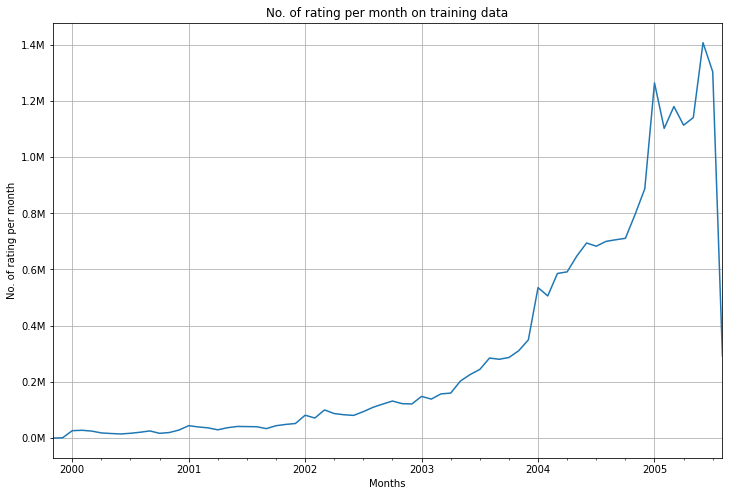

In [ ]:

plt.figure(figsize=(12,8))
ax=train.resample('m',on='Date')['rating'].count().plot()

ax.set_title('No. of rating per month on training data')
plt.xlabel('Months')
plt.ylabel('No. of rating per month')
ax.set_yticklabels([convert_to_text(item,'M') for item in ax.get_yticks()])
plt.grid()
plt.show()


In [ ]:
no_of_ratedmovies_by_a_user=train.groupby(by='user')['rating'].count().sort_values(ascending=False)


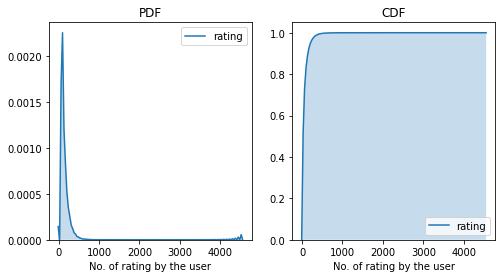

In [ ]:
plt.figure(figsize=plt.figaspect(.5))
ax1=plt.subplot(121)
sns.kdeplot(no_of_ratedmovies_by_a_user,shade=True,ax=ax1)
plt.xlabel('No. of rating by the user')
plt.title('PDF')

ax2=plt.subplot(122)
sns.kdeplot(no_of_ratedmovies_by_a_user,cumulative=True,shade=True,ax=ax2)
plt.xlabel('No. of rating by the user')
plt.title('CDF')
plt.show()

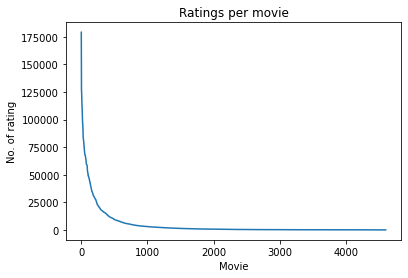

In [ ]:
movie_rated_count=train.groupby(by='movie')['rating'].count().sort_values(ascending=False)
plt.plot(movie_rated_count.values)
plt.title('Ratings per movie')
plt.xlabel('Movie')
plt.ylabel('No. of rating')
plt.show()

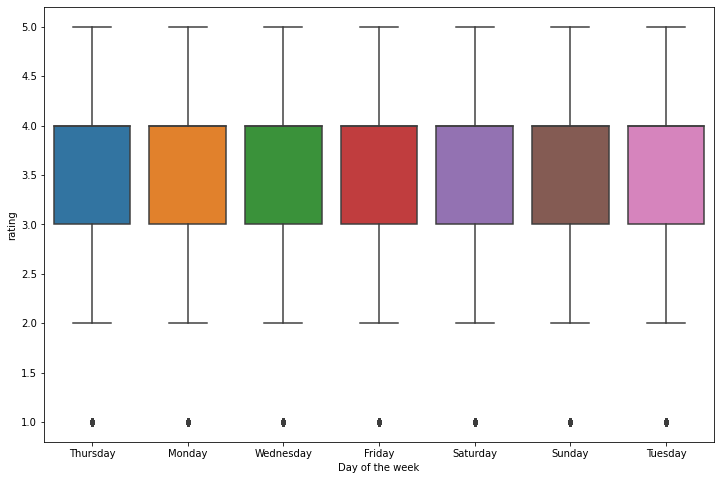

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y='rating',x='Day of the week',data=train)
plt.show()

In [ ]:
Avg_per_weekday=train.groupby(by='Day of the week')['rating'].mean()
Avg_per_weekday

Day of the week
Friday       3.569771
Monday       3.561920
Saturday     3.582555
Sunday       3.579206
Thursday     3.567970
Tuesday      3.560549
Wednesday    3.570788
Name: rating, dtype: float64

In [ ]:
quantile=no_of_ratedmovies_by_a_user.quantile(np.arange(0,1.01,0.01),interpolation='higher')
quantile

0.00       1
0.01       1
0.02       1
0.03       2
0.04       2
        ... 
0.96     229
0.97     258
0.98     298
0.99     370
1.00    4544
Name: rating, Length: 101, dtype: int64

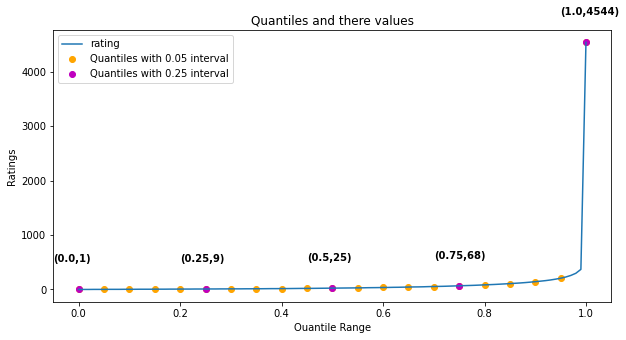

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quantiles and there values')
quantile.plot()
plt.scatter(x=quantile.index[::5],y=quantile.values[::5],c='orange',label='Quantiles with 0.05 interval')
plt.scatter(x=quantile.index[::25],y=quantile.values[::25],c='m',label='Quantiles with 0.25 interval')
plt.legend(loc='best')
plt.xlabel('Ouantile Range')
plt.ylabel('Ratings')


for x,y in zip(quantile.index[::25],quantile.values[::25]):
  plt.annotate(s='({},{})'.format(x,y),xy=(x,y),xytext=(x-0.05, y+500),fontweight='bold')
plt.show()  

In [ ]:
from datetime import datetime
from scipy import sparse
import os

start=datetime.now()

if os.path.isfile('./gdrive/My Drive/Datasets/train_sparse_matrix.npz'):
  print('Its present in your present pwd')
  train_sparse_matrix=sparse.load_npz('./gdrive/My Drive/Datasets/train_sparse_matrix.npz')
  print('Done')
else:
  print('We are creating a sparse matrix from the data frame')
  train_sparse_matrix=sparse.csr_matrix((train.rating.values,(train.user.values,train.movie.values)),)
  print('Done')
  print('Saving into disk for further usage')
  sparse.save_npz('./gdrive/My Drive/Datasets/train_sparse_matrix.npz',train_sparse_matrix)

end=datetime.now() - start 

print(end)



Its present in your present pwd
Done
0:00:04.313745


In [ ]:
test=pd.read_csv('./gdrive/My Drive/Datasets/train_movie.csv')
test.Date=pd.to_datetime(train.Date)

In [ ]:
us,mv=train_sparse_matrix.shape
ele=train_sparse_matrix.count_nonzero()

print('Sparsity of matrix is {} percent'.format( (1-(ele/(us*mv))) *100))

Sparsity of matrix is 99.91156301968628 percent


In [ ]:
from datetime import datetime
from scipy import sparse
start=datetime.now()

if os.path.isfile('./gdrive/My Drive/Datasets/test_sparse_matrix.npz'):
  print('Its present in your present pwd')
  test_sparse_matrix=sparse.load_npz('./gdrive/My Drive/Datasets/test_sparse_matrix.npz')
  print('Done')
else:
  print('We are creating a sparse matrix from the data frame')
  test_sparse_matrix=sparse.csr_matrix((test.rating.values,(test.user.values,test.movie.values)),)
  print('Done')
  print('Saving into disk for further usage')
  sparse.save_npz('./gdrive/My Drive/Datasets/test_sparse_matrix.npz',test_sparse_matrix)

end=datetime.now() - start 

print(end)


Its present in your present pwd
Done
0:00:01.977156


In [ ]:
us,mv=test_sparse_matrix.shape
ele=test_sparse_matrix.count_nonzero()

print('Sparsity of matrix is {} percent'.format( (1-(ele/(us*mv))) *100))

Sparsity of matrix is 99.91156301968628 percent


In [ ]:
test_sparse_matrix.shape

(2649430, 9211)

In [ ]:
#Global Average
train_averages=dict()
train_averages['global']=train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()


In [ ]:
train_averages

{'global': 3.568994858325002}

In [ ]:
#Average rating per user
train_sparse_matrix!=0
    


<2649430x9211 sparse matrix of type '<class 'numpy.bool_'>'
	with 21582072 stored elements in Compressed Sparse Row format>

In [ ]:
def get_average_rating(sparse_matrix,of_user):
  ax=1 if of_user else 0 

  sum_of_rating=sparse_matrix.sum(axis=ax).A1
  is_rated=sparse_matrix!=0
  no_of_rating=is_rated.sum(axis=ax).A1
  u,m=sparse_matrix.shape
  average_rating={ i : sum_of_rating[i]/no_of_rating[i] for i in range(u if of_user else m) if no_of_rating[i]!=0}
  return average_rating

In [ ]:
train_averages['user']=get_average_rating(train_sparse_matrix,of_user=True)
train_averages['movie']=get_average_rating(train_sparse_matrix,of_user=False)

In [ ]:
print('Average rating for user {} is {} '.format(10,train_averages['user'][10]))
print('Average rating for movie {} is {} '.format(4710,train_averages['movie'][4710]))
print('Global average is',train_averages['global'])

Average rating for user 10 is 3.2950819672131146 
Average rating for movie 4710 is 3.5090909090909093 
Global average is 3.568994858325002


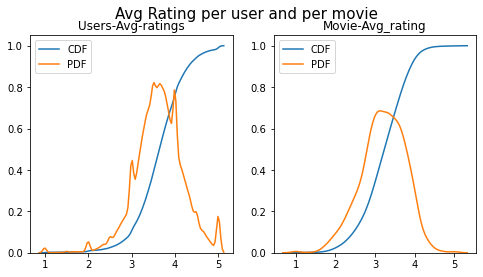

In [ ]:
start=datetime.now()

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=plt.figaspect(0.5))
fig.suptitle('Avg Rating per user and per movie',fontsize=15)

ax1.set_title('Users-Avg-ratings')
user_averages=[i for i in train_averages['user'].values()]
sns.distplot(user_averages,ax=ax1,hist=False,kde_kws=dict(cumulative=True),label='CDF')
sns.distplot(user_averages,ax=ax1,hist=False,label='PDF')

ax2.set_title('Movie-Avg_rating')
movie_averages=[i for i in train_averages['movie'].values()]
sns.distplot(movie_averages,ax=ax2,hist=False,kde_kws=dict(cumulative=True),label='CDF')
sns.distplot(movie_averages,ax=ax2,hist=False,label='PDF')

plt.show()

In [ ]:
#total_users=len(np.unique(df.user))
#user_in_train=len(np.unique(train.user))
#print('Total users in datasets ',total_users)
#print('We have to face {} New user in test '.format(total_users-user_in_train))
#print((total_users-user_in_train)/total_users*100)
print('''Total users in datasets  474062
We have to face 80129 New user in test 
16.902641426648835''')

Total users in datasets  474062
We have to face 80129 New user in test 
16.902641426648835


In [ ]:
#total_users=len(np.unique(df.movie))
#user_in_train=len(np.unique(train.movie))
#print('Total movie in datasets ',total_users)
#print('We have to face {} New movie in test '.format(total_users-user_in_train))
#print((total_users-user_in_train)/total_users*100)
print('''Total movie in datasets  4711
We have to face 106 New movie in test 
2.250053067289323''')

Total movie in datasets  4711
We have to face 106 New movie in test 
2.250053067289323


# COMPUTING USER-USER SIMILARITY

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_user_similarity(sparse_matrix,compute_for_few=False,top=100,verbose=False,verb_for_nrows=20,draw_time_taken=True):
  no_of_user,_=sparse_matrix.shape
  row_ind,col_ind=sparse_matrix.nonzero()
  row_ind=sorted(set(row_ind))
  time_taken=list()

  rows,cols,data=list(),list(),list()
  if verbose:
    print('Computing top',top,'Similarities of each user')

  start=datetime.now()
  temp=0

  for row in row_ind[:top] if compute_for_few else row_ind:
    temp+=1
    prev=datetime.now()
    sim=cosine_similarity(sparse_matrix.getrow(row),sparse_matrix).ravel()
    top_sim_ind=sim.argsort()[-top:]
    top_sim_vaues=sim[top_sim_ind]
    rows.extend([row]*top)
    cols.extend(top_sim_ind)
    data.extend(top_sim_vaues)
    time_taken.append(datetime.now().timestamp()- prev.timestamp())
    if verbose:
      if temp%verb_for_nrows==0:
        print("computing done for {} users [  time elapsed : {}  ]".format(temp, datetime.now()-start))
  if verbose: print('Creating Sparse matrix from the computed similarities')    

  if draw_time_taken:
    plt.plot(time_taken,label='Time taken for each user')
    plt.plot(np.cumsum(time_taken),label='Total Time')
    plt.legend(loc='best')
    plt.xlabel('User')
    plt.ylabel(' time taken(in second)')
    plt.grid()
    plt.show()      

  return sparse.csr_matrix((data,(rows,cols)),shape=(no_of_user,no_of_user)),time_taken    


Computing top 100 Similarities of each user
computing done for 20 users [  time elapsed : 0:00:15.825918  ]
computing done for 40 users [  time elapsed : 0:00:31.676711  ]
computing done for 60 users [  time elapsed : 0:00:47.026224  ]
computing done for 80 users [  time elapsed : 0:01:02.323007  ]
computing done for 100 users [  time elapsed : 0:01:17.846923  ]
Creating Sparse matrix from the computed similarities


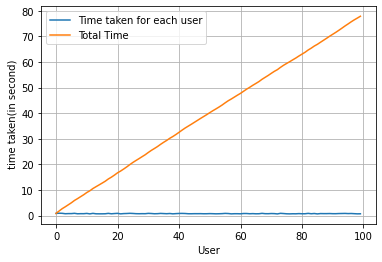

----------------------------------------------------------------------------------------------------
0:01:20.907647


In [ ]:
#start = datetime.now()
#u_u_sim_matrix,_=compute_user_similarity(train_sparse_matrix,compute_for_few=True,verbose=True)
#print('-'*100)
#print(datetime.now()-start)

In [ ]:
#from sklearn.decomposition import TruncatedSVD

#start=datetime.now()
#netflix_svd=TruncatedSVD(n_components=200,algorithm='randomized',random_state=15)
#truncated_svd=netflix_svd.fit_transform(train_sparse_matrix)

#print('Time taken',datetime.now()-start)

#Can't try svd as RAM crashed

# MOvie MOVIE SIMILARITY

In [ ]:
start=datetime.now()

if not os.path.isfile('./gdrive/My Drive/Datasets/m-m sim.npz'):
  print("It seems you don't have that file. Computing movie_movie similarity...")
  start=datetime.now()
  m_m_sim_sparse=cosine_similarity(X=train_sparse_matrix.T,dense_output=False)
  print('Done')
  print("Saving it to disk without the need of re-computing it again.. ")
  sparse.save_npz('./gdrive/My Drive/Datasets/m-m sim.npz', m_m_sim_sparse)
  print("Done..")

else:
  print('It will be there')
  m_m_sim_sparse=sparse.load_npz('./gdrive/My Drive/Datasets/m-m sim.npz')
  print('Loaded')

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It seems you don't have that file. Computing movie_movie similarity...
Done
Saving it to disk without the need of re-computing it again.. 
Done..
It's a  (9211, 9211)  dimensional matrix
0:00:40.162656


In [ ]:
import numpy as np

movie_id=np.unique(m_m_sim_sparse.nonzero()[1])

In [ ]:
start=datetime.now()
similar_movies=dict()

for movie in movie_id:
  sim_movies=m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
  similar_movies[movie]=sim_movies[:100]
print(datetime.now()-start)

0:00:02.669056


In [ ]:
similar_movies[4502]

array([5852, 6041, 5301, 6055, 7848, 6282, 6431, 8439, 7171, 5339, 7084,
       5902, 7592, 9151, 6335, 9140, 7731, 9126, 5157, 6288, 8069, 4673,
       7452, 8153, 9157, 6009, 9093, 7477, 6363, 6715, 6933, 7106, 6516,
       6774, 8044, 5641, 6547, 8303, 6304, 6766, 6257, 5346, 6130, 5934,
       7187, 5915, 6789, 5547, 5131, 5213, 6411, 8646, 6189, 4700, 8284,
       4772, 8710, 5324, 8936, 5146, 7213, 5925, 6646, 8565, 8358, 8407,
       9053, 8924, 8419, 6491, 4856, 5619, 6770, 9142, 6857, 5645, 5197,
       8152, 7480, 8491, 7315, 4677, 5870, 6216, 8952, 8273, 4687, 5678,
       9069, 7694, 5824, 8494, 7412, 7413, 5286, 6948, 6259, 7520, 8476,
       6818])

In [ ]:
movie_title=pd.read_csv('./gdrive/My Drive/Datasets/movie_titles.csv',sep=',', header = None,names=['movie_id', 'year_of_release', 'title'], verbose=True,index_col = 'movie_id', encoding = "ISO-8859-1")

Tokenization took: 16.05 ms
Type conversion took: 8.66 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
movie_title.head()

,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [ ]:
mv_id=5089

print('Movie name for movie id {} is {}'.format(mv_id,movie_title.iloc[mv_id]['title']))
print('Number of Rating for this movie is {} '.format(train_sparse_matrix[:,mv_id].getnnz()))
print('We have {} movies similar to this '.format(m_m_sim_sparse[:,mv_id].getnnz()))

Movie name for movie id 5089 is The Survivors
Number of Rating for this movie is 104 
We have 4579 movies similar to this 


In [ ]:
movie_title.iloc[similar_movies[mv_id]][:10]

,year_of_release,title
movie_id,,
7506,1999.0,Kohram
8061,2003.0,Black Sabbath: Never Say Die
4916,2002.0,Tycoon: A New Russian
5019,1944.0,The Princess and the Pirate
6126,2002.0,Winter Break
7698,1996.0,Children of the Revolution
6052,1968.0,The Killing of Sister George
7280,2004.0,Motives
6630,1999.0,Jakob the Liar


In [ ]:
similarities=m_m_sim_sparse[mv_id].toarray().ravel()
similar_indices=similarities.argsort()[::-1][1:]
similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:]

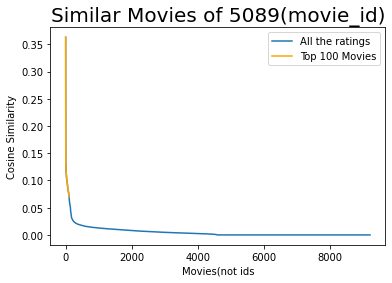

In [ ]:
plt.plot(similarities[similar_indices],label='All the ratings')
plt.plot(similarities[sim_indices[:100]],c='orange',label='Top 100 Movies')
plt.title('Similar Movies of {}(movie_id)'.format(mv_id), fontsize=20)
plt.xlabel('Movies(not ids')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()

# Machine Learning Model

In [ ]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

In [ ]:
from datetime import datetime
from scipy import sparse
start = datetime.now()

if os.path.isfile('./gdrive/My Drive/Datasets/sample_train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz('./gdrive/My Drive/Datasets/sample_train_sparse_matrix.npz')
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=10000, no_movies=1000,path='./gdrive/My Drive/Datasets/sample_train_sparse_matrix.npz')

print(datetime.now() - start)
  

It is present in your pwd, getting it from disk....
DONE..
0:00:00.266134


In [ ]:
start=datetime.now()

if os.path.isfile('./gdrive/My Drive/Datasets/sample_test_sparse_matrix.npz'):
  print('Its already present in your pwd')
  print('Getting from your disk')
  sample_test_sparse_matrix=sparse.load_npz('./gdrive/My Drive/Datasets/sample_test_sparse_matrix.npz')
else:
  sample_test_sparse_matrix=get_sample_sparsematrix(test_sparse_matrix,no_movies=500,no_users=5000,path='./gdrive/My Drive/Datasets/sample_test_sparse_matrix.npz')
  print('Done')
print(datetime.now()-start)  

Its already present in your pwd
Getting from your disk
0:00:00.039564


In [ ]:
sample_tran_averages=dict()


In [ ]:
sample_tran_averages['global']=sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_tran_averages['Avg_rating_per_user']=get_average_rating(sample_train_sparse_matrix,of_user=True)
sample_tran_averages['Avg_rating_per_movie']=get_average_rating(sample_train_sparse_matrix,of_user=False)


In [ ]:
print('Average rating per movie for movie id {} is {}'.format(4501,sample_tran_averages['Avg_rating_per_movie'][4502]))

Average rating per movie for movie id 4501 is 2.0


In [ ]:
print('Average rating per user for user id {} is {}'.format(106346,sample_tran_averages['Avg_rating_per_user'][275911]))

Average rating per user for user id 106346 is 3.0


In [ ]:
print('Number rating in train {}'.format(sample_train_sparse_matrix.count_nonzero()))
print('Number rating in test {}'.format(sample_test_sparse_matrix.count_nonzero()))

Number rating in train 131674
Number rating in test 33232


In [ ]:
sample_train_users,sample_train_movies,sample_train_ratings=sparse.find(sample_train_sparse_matrix)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print('Preparing a tuple of size {}'.format(len(sample_train_ratings)))
if os.path.isfile('./gdrive/My Drive/Datasets/reg_train.csv'):
  print('File already exist no need to run it again :)')

else:
  with open('./gdrive/My Drive/Datasets/reg_train.csv',mode='w') as reg_data_file:
    count=0
    for (user_id,movie_id,rating) in zip(sample_train_users,sample_train_movies,sample_train_ratings):
  
      st=datetime.now()
      #--------------------- Ratings of "movie" by similar users of "user" --------------------
      user_sim=cosine_similarity(sample_train_sparse_matrix[user_id],sample_train_sparse_matrix).ravel()
      top_sim_users=user_sim.argsort()[::-1][1:]
      top_ratings=sample_train_sparse_matrix[top_sim_users,movie_id].toarray().ravel()
      top_sim_users_ratings=list(top_ratings[top_ratings!=0][:5])
      top_sim_users_ratings.extend([sample_tran_averages['Avg_rating_per_movie'][movie_id]]*(5 - len(top_sim_users_ratings)))
  
      #--------------------- Ratings by "user"  to similar movies of "movie" --------------------
      movie_sim=cosine_similarity(sample_train_sparse_matrix.T[movie_id],sample_train_sparse_matrix.T).ravel()
      top_movie_sim=movie_sim.argsort()[::-1][1:]
      top_ratings_movie=sample_train_sparse_matrix.T[top_movie_sim,user_id].toarray().ravel()
      top_sim_movie_ratings=list(top_ratings_movie[top_ratings_movie!=0][:5])
      top_sim_movie_ratings.extend([sample_tran_averages['Avg_rating_per_user'][user_id]]*(5 - len(top_sim_movie_ratings)))
      
  
      #-----------------prepare the row to be stores in a file-----------------#
      row=list()
      row.append(user_id)
      row.append(movie_id)
      row.append(sample_tran_averages['global'])
      row.extend(top_sim_users_ratings)
      row.extend(top_sim_movie_ratings)
      row.append(sample_tran_averages['Avg_rating_per_user'][user_id])
      row.append(sample_tran_averages['Avg_rating_per_movie'][movie_id])
      row.append(rating)
      count+=1

      reg_data_file.write(','.join(map(str,row)))
      reg_data_file.write('\n')  
      if (count)%10000 == 0:
                # print(','.join(map(str, row)))
        print("Done for {} rows----- {}".format(count, datetime.now() - start))

print(datetime.now()-start)

Preparing a tuple of size 131674
File already exist no need to run it again :)
0:00:16.249637


In [ ]:
sample_test_users,sample_test_movies,sample_test_ratings=sparse.find(sample_test_sparse_matrix)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print('Preparing a tuple of size {}'.format(len(sample_test_ratings)))
if os.path.isfile('./gdrive/My Drive/Datasets/reg_test.csv'):
  print('File already exist no need to run it again :)')

else:
  with open('./gdrive/My Drive/Datasets/reg_test.csv',mode='w') as reg_data_file:
    count=0
    for (user_id,movie_id,rating) in zip(sample_test_users,sample_test_movies,sample_test_ratings):
  
      st=datetime.now()
      #--------------------- Ratings of "movie" by similar users of "user" --------------------
      try:
        user_sim=cosine_similarity(sample_train_sparse_matrix[user_id],sample_train_sparse_matrix).ravel()
        top_sim_users=user_sim.argsort()[::-1][1:]
        top_ratings=sample_train_sparse_matrix[top_sim_users,movie_id].toarray().ravel()
        top_sim_users_ratings=list(top_ratings[top_ratings!=0][:5])
        top_sim_users_ratings.extend([sample_tran_averages['Avg_rating_per_movie'][movie_id]]*(5 - len(top_sim_users_ratings)))
      except (IndexError , KeyError):
        top_sim_users_ratings.extend([sample_tran_averages['global']]*(5 - len(top_sim_users_ratings)))

      except :
        print(user_id,movie_id)
        raise

       
      #--------------------- Ratings by "user"  to similar movies of "movie" --------------------
      try:
        movie_sim=cosine_similarity(sample_train_sparse_matrix.T[movie_id],sample_train_sparse_matrix.T).ravel()
        top_movie_sim=movie_sim.argsort()[::-1][1:]
        top_ratings_movie=sample_train_sparse_matrix.T[top_movie_sim,user_id].toarray().ravel()
        top_sim_movie_ratings=list(top_ratings_movie[top_ratings_movie!=0][:5])
        top_sim_movie_ratings.extend([sample_tran_averages['Avg_rating_per_user'][user_id]]*(5 - len(top_sim_movie_ratings)))
      
      except (IndexError , KeyError):
        top_sim_movie_ratings.extend([sample_tran_averages['global']]*(5 - len(top_sim_users_ratings)))

      except :
        print(user_id,movie_id)  
        raise
  
      #-----------------prepare the row to be stores in a file-----------------#
      row=list()
      row.append(user_id)
      row.append(movie_id)
      row.append(sample_tran_averages['global'])
      row.extend(top_sim_users_ratings)
      row.extend(top_sim_movie_ratings)
      try:
        row.append(sample_tran_averages['Avg_rating_per_user'][user_id])
      except KeyError:
        row.append(sample_tran_averages['global'])
      
      try:
        row.append(sample_tran_averages['Avg_rating_per_movie'][movie_id])
      except KeyError:
        row.append(sample_tran_averages['global'])


      row.append(rating)
      count+=1

      reg_data_file.write(','.join(map(str,row)))
      reg_data_file.write('\n')  
      if (count)%10000 == 0:
                # print(','.join(map(str, row)))
        print("Done for {} rows----- {}".format(count, datetime.now() - start))

print(datetime.now()-start)

Preparing a tuple of size 33232
Done for 10000 rows----- 0:30:03.709554
Done for 20000 rows----- 0:58:22.970288


In [37]:
import pandas as pd

reg_train=pd.read_csv('./gdrive/My Drive/Datasets/reg_train.csv',names=['user','movie','GAvg','sur1','sur2','sur3','sur4','sur5','smr1','smr2','smr3','smr4','smr5','UAvg','MAvg','rating'])
reg_train.head()


,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,478815,4502,3.606961,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,2.0,3.415094,2.000000,2
1,63623,4504,3.606961,5.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0,4.0,2.0,3.128205,4.000000,3
2,872645,4504,3.606961,3.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.000000,4
3,2199854,4504,3.606961,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.263889,4.000000,5
4,17451,4515,3.606961,4.0,3.0,4.0,3.0,3.0,5.0,5.0,3.0,5.0,5.0,4.767857,3.471698,5


In [38]:
reg_test_df=pd.read_csv('./gdrive/My Drive/Datasets/reg_test1.csv',names=['user','movie','GAvg','sur1','sur2','sur3','sur4','sur5','smr1','smr2','smr3','smr4','smr5','UAvg','MAvg','rating'])
reg_test_df.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
4,28572,111,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,1


# Surprise Library

In [39]:
from surprise import Reader, Dataset
#!pip install surprise

In [40]:
reader=Reader(rating_scale=(1,5))

train_data=Dataset.load_from_df(reg_train[['user','movie','rating']],reader)
trainset=train_data.build_full_trainset()
trainset

In [41]:
testset=list(zip(reg_test_df.user.values,reg_test_df.movie.values,reg_test_df.rating.values))

In [42]:
model_evaluation_train=dict()
model_evaluation_test=dict()

model_evaluation_train,model_evaluation_test

({}, {})

# Function for regression models

In [43]:
def get_error_rmse(y_true,y_pred):
  rmse=np.sqrt(np.mean([(y_true[i]**2 - y_pred[i]**2) for i in range(len(y_pred))]))
  mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
  return rmse,mape

def run_xgboost(algo,x_train,y_train,x_test,y_test,verbose=True):
  train_results=dict()
  test_results=dict()

  print('Training the model')
  start=datetime.now()
  algo.fit(x_train,y_train,eval_metric='rmse')
  print('Done Time Taken to train is {}'.format(datetime.now()-start))

  print('Evaluating on the training set')
  start=datetime.now()
  y_train_pred=algo.predict(x_train)
  rmse_train, mape_train=get_error_rmse(y_train.values,y_train_pred)

  train_results={'rmse':rmse_train,'mape':mape_train,'predictions':y_train_pred}
  print('Time Taken to pred is {}'.format(datetime.now() - start))

  
  print('-------------Test data--------------')
  start=datetime.now()
  y_test_predict=algo.predict(x_test)
  rmse_test, mape_test=get_error_rmse(y_test,y_test_predict)
  test_results={'rmse':rmse_test,'mape':mape_test,'predictions':y_test_predict}
  print('Time Taken to pred is {}'.format(datetime.now() - start))
  if verbose:
    print('Test_data')
    print('-'*30)
    print('RMSE',rmse_test)
    print('Mape',mape_test)

  return train_results, test_results  


# Function using the Surprise **Library**

In [44]:
np.random.seed(42)

def get_ratings(predictions):
  actual=np.array([pred.r_ui for pred in predictions])
  predicted=np.array([pred.est for pred in predictions])

  return actual , predicted

def get_error_metrics(predictions):
  actual, pred= get_ratings(predictions)
  rmse=np.sqrt(np.mean((pred-actual)**2))
  mape=np.mean(np.abs((actual-pred)/actual))*100

  return rmse, mape

def surprise(algo,trainset,testset,verbose=True):
  start=datetime.now()

  train=dict()
  test=dict()

  print('Training the model')
  algo.fit(trainset)
  print('Time Taken',datetime.now()- start)

  print('Predicting on the train set')
  train_preds=algo.test(trainset.build_testset())

  train_actual_rating,train_pred_ratings=get_ratings(train_preds)
  train_rmse,train_mape=get_error_metrics(train_preds)
  train['rmse']= train_rmse
  train['mape']= train_mape
  train['predictions']= train_pred_ratings

  print('Time Taken to predict {}'.format(datetime.now()-start))

  print('*'*30)
  print('Evaluating on the test set')

  test_preds=algo.test(testset)
  test_actual_rating,test_pred_rating=get_ratings(test_preds)
  test_rmse,test_mape=get_error_metrics(test_preds)
  test['rmse']= test_rmse
  test['mape']= test_mape
  test['predictions']= test_pred_rating

  if verbose:
    print('Result on test set')
    print('-'*30)
    print('RMSE',test_rmse)
    print('MAPE',test_mape)

  return train,test

Training the model
[12:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done Time Taken to train is 0:00:03.661615
Evaluating on the training set
Time Taken to pred is 0:00:00.895619
-------------Test data--------------
Time Taken to pred is 0:00:00.197705
Test_data
------------------------------
RMSE 1.1199710972607433
Mape 34.94241287515349


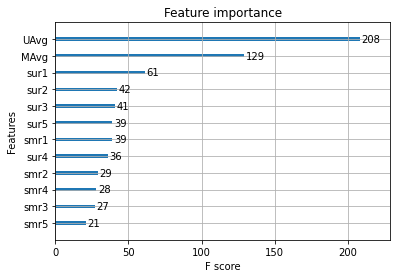

In [45]:
import xgboost as xgb
from datetime import datetime

x_train=reg_train.drop(['user','movie','rating'],axis=1)
y_train=reg_train['rating']

x_test=reg_test_df.drop(['user','movie','rating'],axis=1)
y_test=reg_test_df['rating']

first_xgb=xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results , test_results= run_xgboost(first_xgb,x_train,y_train,x_test,y_test)

model_evaluation_train['first_algo'] = train_results
model_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

# Surprise Baseline model 

In [46]:
from surprise import BaselineOnly


In [47]:
bsl_only={'method':'sgd','learning_rate':0.001 }

Bsl_algo=BaselineOnly(bsl_options=bsl_only)
bsl_train_results,bsl_test_results=surprise(Bsl_algo,trainset,testset,verbose=True)

model_evaluation_train['Bsl_algo']=bsl_train_results
model_evaluation_test['Bsl algo']=bsl_test_results

Training the model
Estimating biases using sgd...
Time Taken 0:00:00.327387
Predicting on the train set
Time Taken to predict 0:00:01.017727
******************************
Evaluating on the test set
Result on test set
------------------------------
RMSE 1.0687594666945914
MAPE 35.13521068242566


# XGBoost with 13 features + BaselineOnly predictions

In [48]:
reg_train['bslpr']=model_evaluation_train['Bsl_algo']['predictions']
reg_test_df['bslpr']=model_evaluation_test['Bsl algo']['predictions']
reg_test_df.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.617401
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.617401
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3,3.617401
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.617401
4,28572,111,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,1,3.617401


Training the model
[12:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done Time Taken to train is 0:00:04.170661
Evaluating on the training set
Time Taken to pred is 0:00:00.896866
-------------Test data--------------
Time Taken to pred is 0:00:00.179930
Test_data
------------------------------
RMSE 1.119175995749411
Mape 34.94425484676672


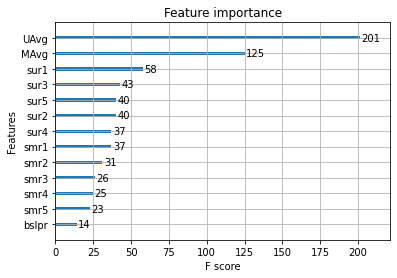

In [49]:
x_train=reg_train.drop(['user','movie','rating'],axis=1)
y_train=reg_train['rating']

x_test=reg_test_df.drop(['user','movie','rating'],axis=1)
y_test=reg_test_df['rating']

xgb_bsl=xgb.XGBRegressor(n_estimators=100,silent=False,n_jobs=13,random_state=15)

train_results,test_results=run_xgboost(xgb_bsl,x_train,y_train,x_test,y_test)

model_evaluation_train['xg_bsl']=train_results
model_evaluation_test['xg_bsl']=test_results

xgb.plot_importance(xgb_bsl)
plt.show()

# Surprise KNNBaseline with user user similarity

In [50]:
from surprise import KNNBaseline

sim_options={'user-based':True,'name':'pearson_baseline','shrinkage':100,'min_support':2}
bsl_options={'method':'sgd'}

Knn_bsl=KNNBaseline(k=40,sim_options=sim_options,bsl_options=bsl_options)

train_results,test_results=surprise(Knn_bsl,trainset,testset)


model_evaluation_train['KNN_Baseline']=train_results
model_evaluation_test['KNN_Baseline']=test_results

Training the model
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Time Taken 0:00:24.977314
Predicting on the train set
Time Taken to predict 0:01:33.144812
******************************
Evaluating on the test set
Result on test set
------------------------------
RMSE 1.068536956856252
MAPE 35.091479286753504


In [51]:
reg_train['knbslu']=model_evaluation_train['KNN_Baseline']['predictions']
reg_test_df['knbslu']=model_evaluation_test['KNN_Baseline']['predictions']

reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knbslu
0,478815,4502,3.606961,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,2.0,3.415094,2.000000,2,3.574917,2.000000
1,63623,4504,3.606961,5.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0,4.0,2.0,3.128205,4.000000,3,3.240605,2.978277
2,872645,4504,3.606961,3.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.000000,4,3.201570,4.083661
3,2199854,4504,3.606961,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.263889,4.000000,5,3.491476,4.155662
4,17451,4515,3.606961,4.0,3.0,4.0,3.0,3.0,5.0,5.0,3.0,5.0,5.0,4.767857,3.471698,5,2.492183,2.750511


# Xgboost 13 features + Surprise BaselineOnly + Surprise KNNBaseline Predictor

In [52]:


sim_options={'user-based':False,'name':'pearson_baseline','shrinkage':100,'min_support':2}
bsl_options={'method':'sgd'}

Knn_bsl_m=KNNBaseline(k=40,sim_options=sim_options,bsl_options=bsl_options)

train_results,test_results=surprise(Knn_bsl_m,trainset,testset)


model_evaluation_train['KNN_Baseline_Movie']=train_results
model_evaluation_test['KNN_Baseline_Movie']=test_results

Training the model
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Time Taken 0:00:25.166815
Predicting on the train set
Time Taken to predict 0:01:32.577253
******************************
Evaluating on the test set
Result on test set
------------------------------
RMSE 1.068536956856252
MAPE 35.091479286753504


In [53]:
reg_train['knbslm']=model_evaluation_train['KNN_Baseline_Movie']['predictions']
reg_test_df['knbslm']=model_evaluation_test['KNN_Baseline_Movie']['predictions']
reg_test_df.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knbslu,knbslm
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.617401,3.617401,3.617401
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.617401,3.617401,3.617401
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3,3.617401,3.617401,3.617401
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.617401,3.617401,3.617401
4,28572,111,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,1,3.617401,3.617401,3.617401


Training the model
[12:55:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done Time Taken to train is 0:00:04.955313
Evaluating on the training set
Time Taken to pred is 0:00:00.911723
-------------Test data--------------
Time Taken to pred is 0:00:00.190281
Test_data
------------------------------
RMSE 1.130128528860984
Mape 34.91831078746865


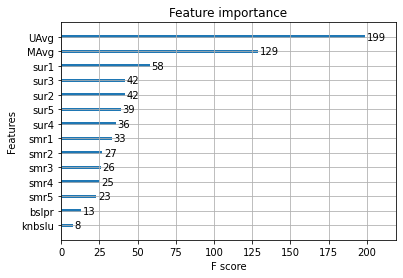

In [54]:
x_train=reg_train.drop(['user','movie','rating'],axis=1)
y_train=reg_train['rating']

x_test=reg_test_df.drop(['user','movie','rating'],axis=1)
y_test=reg_test_df['rating']

xgb_knnbsl=xgb.XGBRegressor(n_estimators=100,silent=False,n_jobs=13,random_state=15)

train_results,test_results=run_xgboost(xgb_knnbsl,x_train,y_train,x_test,y_test)

model_evaluation_train['xg_knnbsl']=train_results
model_evaluation_test['xg_knnbsl']=test_results

xgb.plot_importance(xgb_knnbsl)
plt.show()

# **Matrix Factorization**

In [55]:
from surprise import SVD


In [57]:
svd=SVD(n_factors=100,biased=True,random_state=15,verbose=True)
svd_train_results, svd_test_results=surprise(svd,trainset,testset)

model_evaluation_train['svd']=svd_train_results
model_evaluation_test['svd']=svd_test_results


Training the model
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Time Taken 0:00:05.037453
Predicting on the train set
Time Taken to predict 0:00:05.946906
******************************
Evaluating on the test set
Result on test set
------------------------------
RMSE 1.0687212033625166
MAPE 35.10897836422526


# SVD with implicit feedback

In [58]:
from surprise import SVDpp


In [59]:
svdpp=SVDpp(n_factors=50,random_state=15,verbose=True)

svdp_trainresults,svdp_testresults=surprise(svdpp,trainset,testset)

model_evaluation_train['SVDPP']=svdp_trainresults
model_evaluation_test['SVDPP']=svdp_testresults

Training the model
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Time Taken 0:00:54.318896
Predicting on the train set
Time Taken to predict 0:00:58.799703
******************************
Evaluating on the test set
Result on test set
------------------------------
RMSE 1.0682655131571284
MAPE 35.07462443792354


# Xgboost 13 features+ BaselineOnly + KNN Baseline + MF

In [60]:
reg_train['svd']=model_evaluation_train['svd']['predictions']
reg_train['svdpp']=model_evaluation_train['SVDPP']['predictions']
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knbslu,knbslm,svd,svdpp
0,478815,4502,3.606961,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,2.0,3.415094,2.000000,2,3.574917,2.000000,2.000000,3.243041,3.068291
1,63623,4504,3.606961,5.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0,4.0,2.0,3.128205,4.000000,3,3.240605,2.978277,2.978277,2.880292,3.616339
2,872645,4504,3.606961,3.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.000000,4,3.201570,4.083661,4.083661,3.518647,3.814958
3,2199854,4504,3.606961,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.263889,4.000000,5,3.491476,4.155662,4.155662,3.919135,4.153758
4,17451,4515,3.606961,4.0,3.0,4.0,3.0,3.0,5.0,5.0,3.0,5.0,5.0,4.767857,3.471698,5,2.492183,2.750511,2.750511,2.765345,3.122830


In [61]:
reg_test_df['svd']=model_evaluation_test['svd']['predictions']
reg_test_df['svdpp']=model_evaluation_test['SVDPP']['predictions']
reg_test_df.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knbslu,knbslm,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.617401,3.617401,3.617401,3.617401,3.617401
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.617401,3.617401,3.617401,3.617401,3.617401
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3,3.617401,3.617401,3.617401,3.617401,3.617401
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.617401,3.617401,3.617401,3.617401,3.617401
4,28572,111,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,1,3.617401,3.617401,3.617401,3.617401,3.617401


Training the model
[13:14:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done Time Taken to train is 0:00:05.699279
Evaluating on the training set
Time Taken to pred is 0:00:00.895065
-------------Test data--------------
Time Taken to pred is 0:00:00.192986
Test_data
------------------------------
RMSE 1.116299388245602
Mape 34.9491756720693


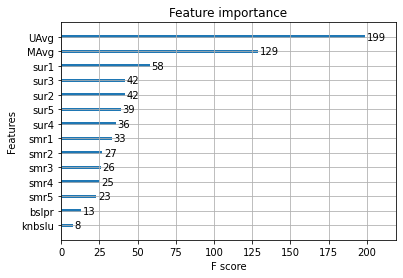

In [62]:
x_train=reg_train.drop(['user','movie','rating'],axis=1)
y_train=reg_train['rating']

x_test=reg_test_df.drop(['user','movie','rating'],axis=1)
y_test=reg_test_df['rating']

xgb_final=xgb.XGBRegressor(n_estimators=100,silent=False,n_jobs=13,random_state=15)

train_results,test_results=run_xgboost(xgb_final,x_train,y_train,x_test,y_test)

model_evaluation_train['xg_final']=train_results
model_evaluation_test['xg_final']=test_results

xgb.plot_importance(xgb_knnbsl)
plt.show()

# Xgboost without 13 features

Training the model
[13:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done Time Taken to train is 0:00:04.012687
Evaluating on the training set
Time Taken to pred is 0:00:00.845905
-------------Test data--------------
Time Taken to pred is 0:00:00.188383
Test_data
------------------------------
RMSE 0.9847982456236147
Mape 35.32835256793758


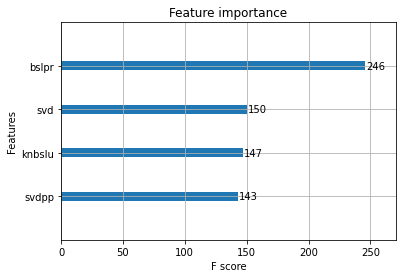

In [65]:
x_train=reg_train[['bslpr','knbslu','knbslm','svd','svdpp']]
y_train=reg_train['rating']

x_test=reg_test_df[['bslpr','knbslu','knbslm','svd','svdpp']]
y_test=reg_test_df['rating']

xgb_all_models=xgb.XGBRegressor(n_estimators=100,silent=False,n_jobs=13,random_state=15)

train_results,test_results=run_xgboost(xgb_all_models,x_train,y_train,x_test,y_test)

model_evaluation_train['xg_all_models']=train_results
model_evaluation_test['xg_all_models']=test_results

xgb.plot_importance(xgb_all_models)
plt.show()

In [69]:
pd.DataFrame(model_evaluation_test).loc['rmse'].sort_values(ascending=True)

xg_all_models         0.984798
SVDPP                  1.06827
KNN_Baseline           1.06854
KNN_Baseline_Movie     1.06854
svd                    1.06872
Bsl algo               1.06876
xg_final                1.1163
xg_bsl                 1.11918
first_algo             1.11997
xg_knnbsl              1.13013
Name: rmse, dtype: object

In [70]:
%%javascript
// Converts integer to roman numeral
// https://github.com/kmahelona/ipython_notebook_goodies
// https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js
function romanize(num) {
    var lookup = {M:1000,CM:900,D:500,CD:400,C:100,XC:90,L:50,XL:40,X:10,IX:9,V:5,IV:4,I:1},
	roman = '',
	    i;
	for ( i in lookup ) {
	    while ( num >= lookup[i] ) {
		roman += i;
		num -= lookup[i];
	    }
	}
	return roman;
 }

// Builds a <ul> Table of Contents from all <headers> in DOM
function createTOC(){
    var toc = "";
    var level = 0;
    var levels = {}
    $('#toc').html('');

    $(":header").each(function(i){
	    if (this.id=='tocheading'){return;}
        
	    var titleText = this.innerHTML;
	    var openLevel = this.tagName[1];

	    if (levels[openLevel]){
		levels[openLevel] += 1;
	    } else{
		levels[openLevel] = 1;
	    }

	    if (openLevel > level) {
		toc += (new Array(openLevel - level + 1)).join('<ul class="toc">');
	    } else if (openLevel < level) {
		toc += (new Array(level - openLevel + 1)).join("</ul>");
		for (i=level;i>openLevel;i--){levels[i]=0;}
	    }

	    level = parseInt(openLevel);


	    if (this.id==''){this.id = this.innerHTML.replace(/ /g,"-")}
	    var anchor = this.id;
        
	    toc += '<li><a style="text-decoration:none", href="#' + encodeURIComponent(anchor) + '">' + titleText + '</a></li>';
        
	});

    
    if (level) {
	toc += (new Array(level + 1)).join("</ul>");
    }

 
    $('#toc').append(toc);

};

// Executes the createToc function
setTimeout(function(){createTOC();},100);

// Rebuild to TOC every minute
setInterval(function(){createTOC();},60000);

<IPython.core.display.Javascript object>